# 💻IDS507 | Lab03
<font size=5><b>Regression Analysis<b></font>
<div align='right'>TA: 류 회 성(Hoe Sung Ryu)</div>

## Concepts | 오늘 배울 개념
---
- 내 데이터를 train/test dataset으로 나누기
- 내 데이터로 `Logistic regression` (로지스틱 회귀) 모델 만들어보기
- 생성한 모델을 이용해 새로운 데이터를 예측해보기
- 내 모델이 얼마나 잘 기능하는가?
- Confusion Matrix, Roc Curve & AUC 계산


## 📌1.드라이브 연동

In [ ]:
from google.colab import drive # 드라이브 연동
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/IDS507-00/2022_IDS507_Lab') # DataPath 설정 

In [ ]:
!pwd

/content/gdrive/My Drive/IDS507-00/2022_IDS507_Lab


## 📌2. 회귀 분석



### 1) 회귀(Regression)
- 데이터의 값은 평균과 같은 기존의 경향으로 돌아가려는 경향
- 여러 변수들 간의 상관 관계를 파악하여, 어떤 특정 변수의 값을 다른 변수들의 값을 이용하여 설명/예측하는 기법
- 독립변수, 종속변수



### 2) 회귀 분석의 유형
- 변수의 개수 및 계수의 형태에 따라 구분
- 독립변수의 개수에 따라
    - 단순 : 독립변수가 1개인 경우
    - 다중 : 독립변수가 여러 개인 경우
- 회귀계수의 형태에 따라
    - 선형 : 계수를 선형 결합으로 표현할 수 있는 경우
    - 비선형 : 계수를 선형 결합으로 표현할 수 없는 경우
    
    

In [ ]:
# sample data 
# 1. train 
X_train = [[1],[2],[3],[4],[5]] # 독립변수의 특성이 1개 밖에 없더라도 각 값들은 리스트 또는 배열의 형태
y_train = [2.3, 3.99, 5.15, 7.89, 8.6]

# 2. test
X_test = [[6],[7]]
y_test = [10.1, 11.9]

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

reg = lr.fit(X_train,y_train)

### 3) 단순 선형 회귀
- 독립변수가 1개이고 종속변수도 1개인 경우, 그들 간의 관계를 **선형적으로 파악**하는 회귀 방식
- `독립변수 X`와 `종속변수 Y`의 **`관계`**를 **`Y = aX + b 형태의 1차 함수식`**으로 표현



#### 회귀 계수 (coefficient) → y = **`a`**x+b
- 독립변수가 종속변수에 끼치는 영향력의 정도로서, 직선의 기울기(slope)



#### 절편 (intercept) → y = ax+**`b`**
- 독립변수가 0일 때의 상수 값



#### 잔차 (residual) → y = ax+b+**`Error`**
- 실제 값과 회귀식의 차이에 따른 오류 값
- 잔차 값이 작을수록, 구해진 회귀식이 데이터들을 더욱 잘 설명하고 있다

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([10.536, 12.186])

In [ ]:
# 추정된 회귀 모형의 회귀 계수 및 절편 값을 확인
# 회귀 계수는 coef_ 속성, 절편은 intercept_ 속성에 각각 값이 할당
print("회귀 계수 : ",reg.coef_)
print("절편 : ",reg.intercept_)
print(f'선형식:y= {reg.coef_[0]}X + {reg.intercept_:.4f}')

회귀 계수 :  [1.65]
절편 :  0.636000000000001
선형식:y= 1.65X + 0.6360


### 4) 사이킷런으로 성능 평가 지표 확인

- 회귀 분석의 평가 지표

|지표|의미|대응함수|
|---|---|---|
|MAE|Mean Absolute Error, 즉 실제값과 예측값의 차이의 절대값들의 평균|metrics 모듈의 mean_absolute_error|
|MSE|Mean Absolute Error, 즉 실제값과 예측값의 차이의 절대값들의 평균|metrics 모듈의 mean_squared_error|
|RMSE|Root of MSE, 즉 MSE의 제곱근 값|math 또는 numpy 모듈의 sqrt|
|$R^2$|결정 계수라고 하며, 실제값의 분산 대비 예측값의 분산의 비율|metrics 모듈의 r2_score 또는 LinearRegression의 score|



In [ ]:
# 결과분석
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred)**(1/2))


0.13594599999999984
0.8321654320987657
0.36099999999999977
0.6008327554319919


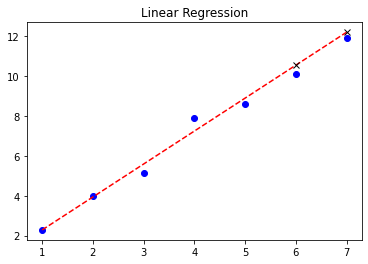

In [ ]:
# 분석 결과 표로 표시하기 
import matplotlib.pyplot as plt
x = range(1,8)
plt.title("Linear Regression")
plt.plot(X_train+X_test,y_train+y_test,'o',color = 'blue')
plt.plot(x,reg.coef_*x+reg.intercept_,'--',color='red')
plt.plot(X_test,y_pred,'x',color = 'black')
plt.show()

## 📌3. 실제 데이터를 활용하여 로지스틱회귀 분석



### 1) 로지스틱 회귀란? 
- 선형 회귀 모형을 **`분류`** 에 적용한 기법
- 데이터가 특정 레이블(클래스)에 소속될 확률을 추정
    - 이 이메일이 스팸일 확률은 얼마
    - 이번 시험에서 합격할 확률은 얼마
- 다른 선형 회귀 모형과는 다르게, 종속변수가 수치형 (numerical)이 아니라 범주형(categorical)
    - 스팸메일, 정상메일
    - 합격, 불합격
- 특정 클래스에 대해서 추정된 확률이 50% 이상이면 해당 데이터를 그 클래스에 속하는 것으로 분류
- 기본적인 로지스틱 회귀는 이항형(binomial)으로서, 종속 변수의 값의 종류는 0과 1의 두 종류
    - 즉, 이 경우의 종속변수는 곧 클래스 그 자체
    - 값이 0이면 음성, 1이면 양성이라고 표현
- 이러한 이진 데이터에 대해서 올바른 결과를 나타내는 선형 회귀를 수행하려면 다음과 같은 성질이 필요
    - 연속적인 단조 증가(monotone increasing) 함수일 것
    - 함수의 결과가 [0, 1] 사이의 값
- 이와 같은 성질을 만족하는 함수를 시그모이드(sigmoid) 함수

$$ y = \frac{1}{1+e^{-x}} $$



### 2) 분류함수의 성능지표

|함수명|설명|
|---|---|
|**accuracy_score**|정확도를 계산한다.|
|**confusion_matrix** |오차 행렬을 도출한다.|
|**precision_score** |정밀도를 계산한다.|
|**recall_score** |재현율을 계산한다.|
|**f1_score** |F1 스코어를 계산한다.|
|**classification_report** | 정밀도, 재현율, F1 스코어를 함께 보여준다|

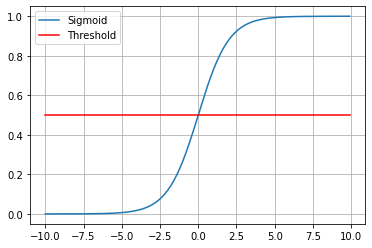

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

X = np.arange(-10,10,0.1)
y = 1 / (1+np.exp(-X))
plt.plot(X,y,label = 'Sigmoid')
plt.plot(X,[0.5 for _ in X],color='red',label = 'Threshold')
plt.legend()
plt.grid()
plt.show()

### 3) 당뇨병 데이터 불러오기
reference:https://www.kaggle.com/saurabh00007/diabetescsv
* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0또는 1)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('./data/diabetes.csv') # 데이터 로드
diabetes_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
print(diabetes_data['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

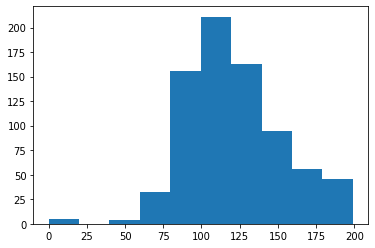

In [ ]:
# 'Glucose' 피처의 분포도
plt.hist(diabetes_data['Glucose'], bins=10)

### 4) scikit-learn 패키지를 사용하여 Train / Test 셋 분리하기

parameter 설명

- `train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)`의 인자(parameter)
```
arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)
test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)
random_state : 데이터 분할시 셔플이 이루어지는데 이를 기억하기 위한 임의의 시드값 (int나 RandomState로 입력)
shuffle : 셔플여부설정 (default = True)
stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때,
            stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.
```


In [ ]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출. 
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

In [ ]:
# 로지스틱 회귀로 학습,예측 및 평가 수행. 

lr_clf = LogisticRegression(max_iter=1000,)
lr_clf.fit(X_train , y_train)
y_pred = lr_clf.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test , y_pred)
print("Accuracy : ",round(accuracy,76))

Accuracy :  0.7987012987012987


In [ ]:
print(500/diabetes_data['Outcome'].value_counts().sum())

0.6510416666666666


### 5) Confusion Matrix(오차행렬)


In [ ]:
# #calculate AUC of model
# pred_proba = lr_clf.predict_proba(X_test)
# pred_proba_c1 = pred_proba[:,1].reshape(-1,1)
# auc = roc_auc_score(y_test, pred_proba_c1)

# #print AUC score
# print(auc)

In [ ]:
roc_auc = roc_auc_score(y_test, pred_proba[:,1]) # calculate AUC of model
confusion = confusion_matrix( y_test, y_pred)
print('AUC score:', roc_auc)
print('오차 행렬')
print(confusion)

AUC score: 0.8072222222222222
오차 행렬
[[90 10]
 [21 33]]


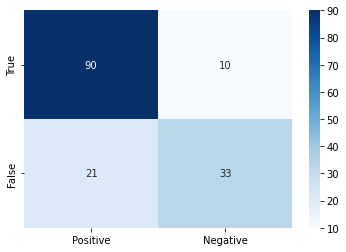

In [ ]:
import pandas as pd 
import seaborn as sns 
matrix = pd.DataFrame(confusion,
                     columns = ['Positive','Negative'],
                     index= ['True','False']
                     )
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='d')

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_proba[:,1], pos_label=1)
# fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
# 
# roc curve for tpr = fpr 
# random_probs = [0 for i in range(len(y_test))]
# p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

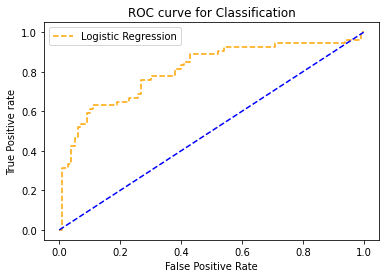

In [ ]:
import matplotlib.pyplot as plt
# plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
# plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
# plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.plot([0,1],[0,1],linestyle='--', color='blue')
# title
plt.title('ROC curve for Classification')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
plt.show();

### 6) Threshold(입계값) 변경하며 성능측정하기

In [ ]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
# pred_proba = lr_clf.predict_proba(X_test)

pred_proba_c1 = pred_proba[:,1].reshape(-1,1)

In [ ]:
from sklearn.preprocessing import Binarizer


for custom_threshold in thresholds:
  binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
  custom_predict = binarizer.transform(pred_proba_c1)
  print('Threshold:',custom_threshold)
  accuracy = accuracy_score(y_test , custom_predict)
  print("Accuracy: ",round(accuracy,3))
  print(" ")

Threshold: 0.3
Accuracy:  0.487
 
Threshold: 0.33
Accuracy:  0.487
 
Threshold: 0.36
Accuracy:  0.494
 
Threshold: 0.39
Accuracy:  0.526
 
Threshold: 0.42
Accuracy:  0.539
 
Threshold: 0.45
Accuracy:  0.552
 
Threshold: 0.48
Accuracy:  0.558
 
Threshold: 0.5
Accuracy:  0.565
 


### 7) 교차검증

일반적으로 회귀에는 기본 k-겹 교차검증을 사용하고, 분류에는 StratifiedKFold를 사용한다.
데이터가 편항되어 단순 k-겹 교차검증을 사용하면 성능 평가가 잘 되지 않을 수 있기때문이다.

<img src='https://jinnyjinny.github.io/assets/post_img/deep%20learning/2020-04-02-Kfold/main3.jpg'>
<br>
<!-- <center>leave-one-out</center>
<center><img src='https://smlee729.github.io/img/2015-03-19-1-loocv/loocv1.png' width=70%></center> -->




In [ ]:
# cross_validation 
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut

kfold = KFold(n_splits=5)
sfold = StratifiedKFold()
# loo = LeaveOneOut()


from sklearn.model_selection import cross_val_score

lr_clf = LogisticRegression(max_iter=1000,)
kfold_score = cross_val_score(lr_clf, X, y, cv=kfold)
sfold_score = cross_val_score(lr_clf, X, y, cv=sfold)
# loo_score = cross_val_score(lr_clf, X, y, cv=loo)

print('Kfold 정확도: {:.2f} %'.format(kfold_score.mean()*100))
print('StratifiedKFold 정확도: {:.2f}'.format(sfold_score.mean()))
# print('LeaveOneOut 정확도: {:.2f}'.format(loo_score.mean()))

Kfold 정확도: 77.09 %
StratifiedKFold 정확도: 0.77
LeaveOneOut 정확도: 0.78
